In [1]:
import pandas as pd

In [3]:
hour = pd.read_csv('hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
print(hour["count"].mean())

189.46308763450142


In [11]:
hour.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [12]:
hour.loc[3,'count']

13

In [13]:
hour.loc[2:4,"registered"]

2    27
3    10
4     1
Name: registered, dtype: int64

In [15]:
# get the mean of the registered column for hr values less than 5
hour.loc[hour['hr']<5, 'registered'].mean()

20.7881427367238

In [18]:
# get the mean of the count column for hr values less than 5 and temp less than 50
hour.loc[(hour['hr']<5)&(hour['temp']<50),'count'].mean()

25.919640348412475

In [19]:
# get the mean of the count column for temp values greater than 0.5 OR hum greater than 0.5
hour.loc[(hour['temp']>0.5) | (hour['hum']>0.5),'count'].mean()

193.36764103264582

In [21]:
# group by season and provide the mean of count
hour.groupby(['season'])['count'].mean()

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: count, dtype: float64

In [23]:
hour.groupby(['season','holiday'])['count'].mean()

season  holiday
1       0          112.685875
        1           72.042683
2       0          208.428472
        1          204.552083
3       0          235.976818
        1          237.822917
4       0          199.965998
        1          167.722222
Name: count, dtype: float64

## Visualizing data with Matplotlib

In [24]:
import matplotlib.pyplot as plt

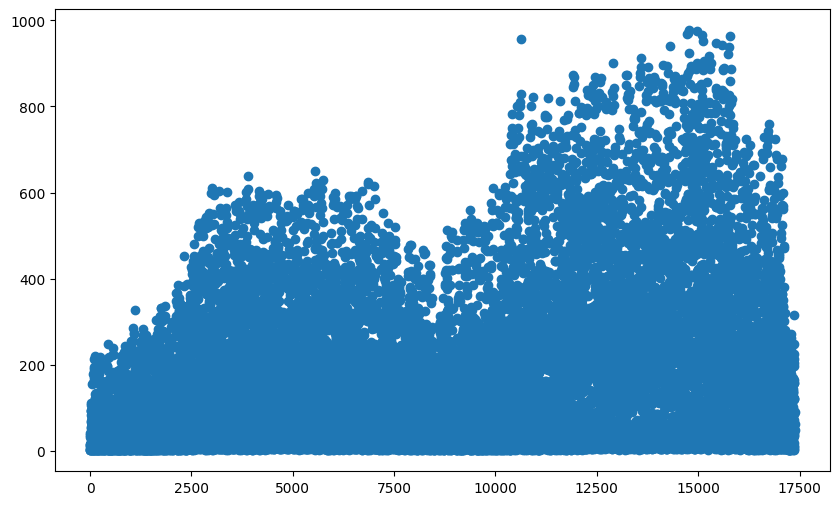

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=hour['instant'],y=hour['count'])
plt.show()

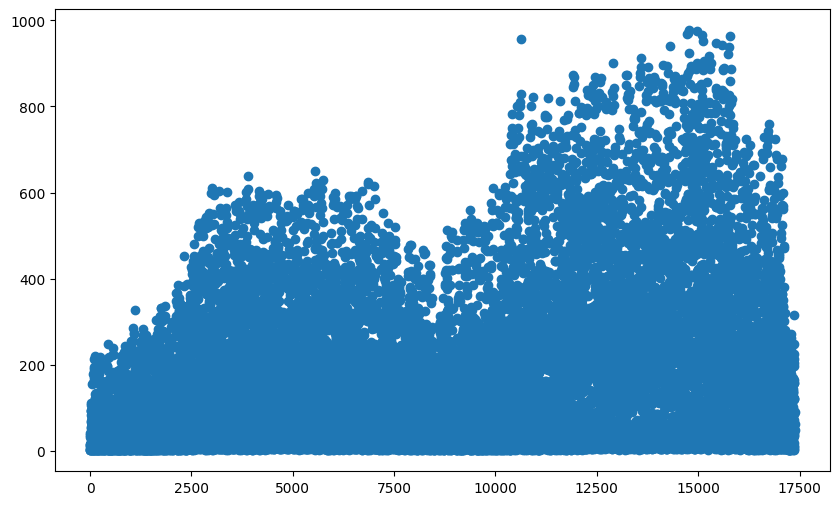

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data=hour, x='instant',y='count')
plt.show()

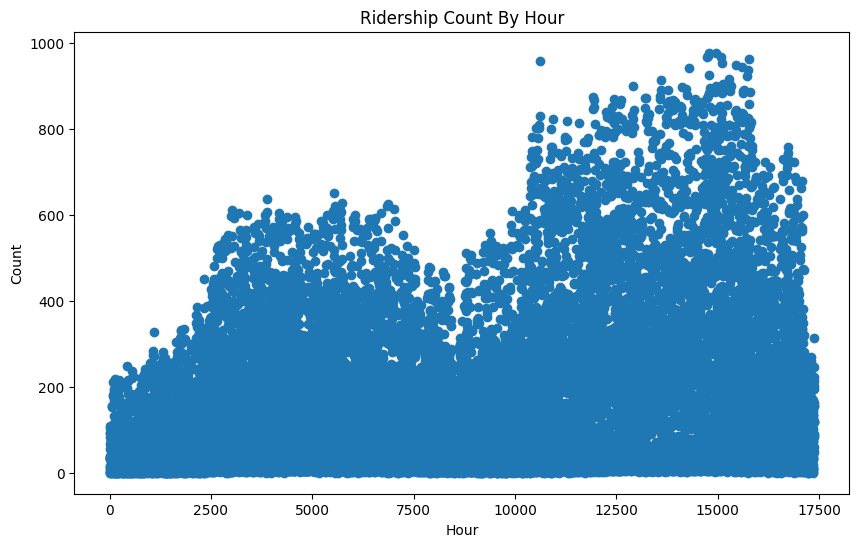

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data=hour, x='instant',y='count')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Count By Hour")
plt.show()

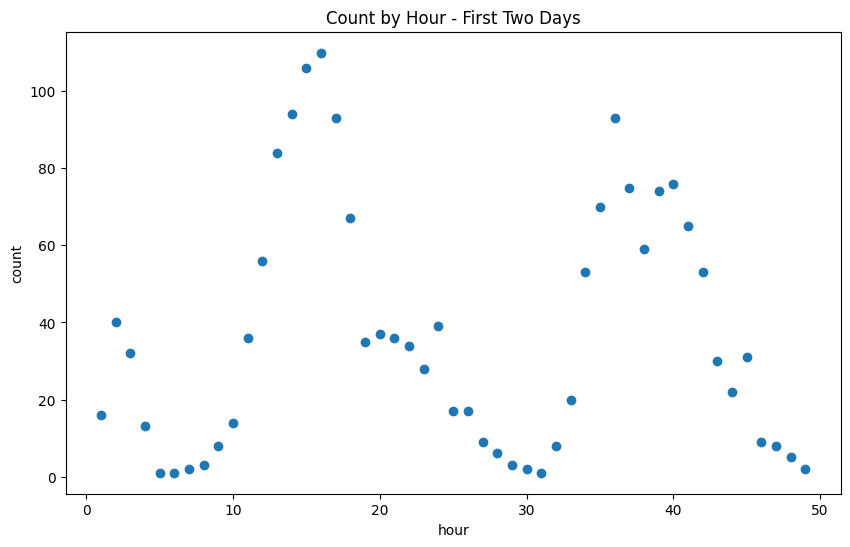

In [37]:
hour_first48 = hour.loc[0:48,:]
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data = hour_first48, x='instant', y='count')
plt.xlabel("hour")
plt.ylabel("count")
plt.title("Count by Hour - First Two Days")
plt.show()

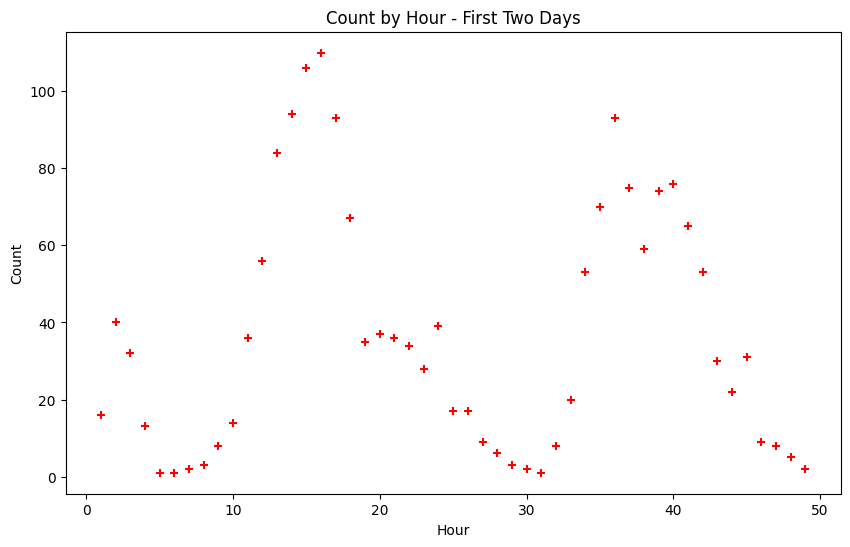

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data=hour_first48, x='instant', y='count', c='red', marker='+')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour - First Two Days")
plt.show()

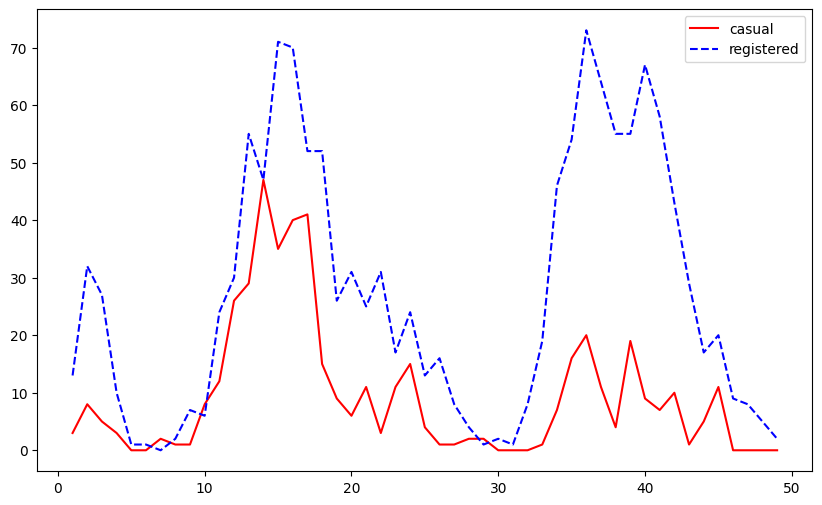

In [44]:
# Plot the casual rider count and registered rider count for the first 2 days
fig, ax = plt.subplots(figsize=(10,6))
ax.plot('instant', 'casual', c='red', label='casual',linestyle='-',data = hour_first48)
ax.plot('instant', 'registered', c='blue', label='registered', linestyle='--', data = hour_first48)
ax.legend()
plt.show()

In [45]:
import seaborn as sns

C:\Users\timry\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


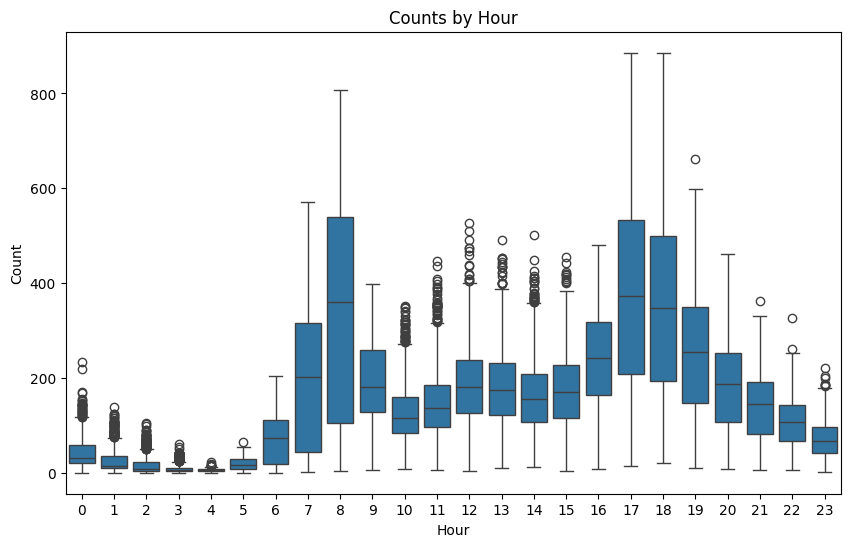

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=hour, x='hr', y='registered')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Counts by Hour")
plt.show()

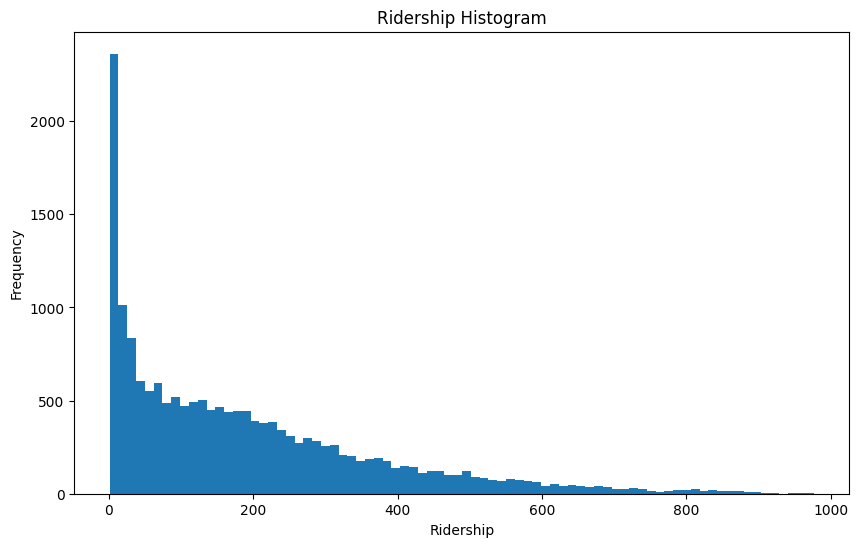

In [49]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(hour["count"], bins=80)
plt.xlabel("Ridership")
plt.ylabel("Frequency")
plt.title("Ridership Histogram")
plt.show()

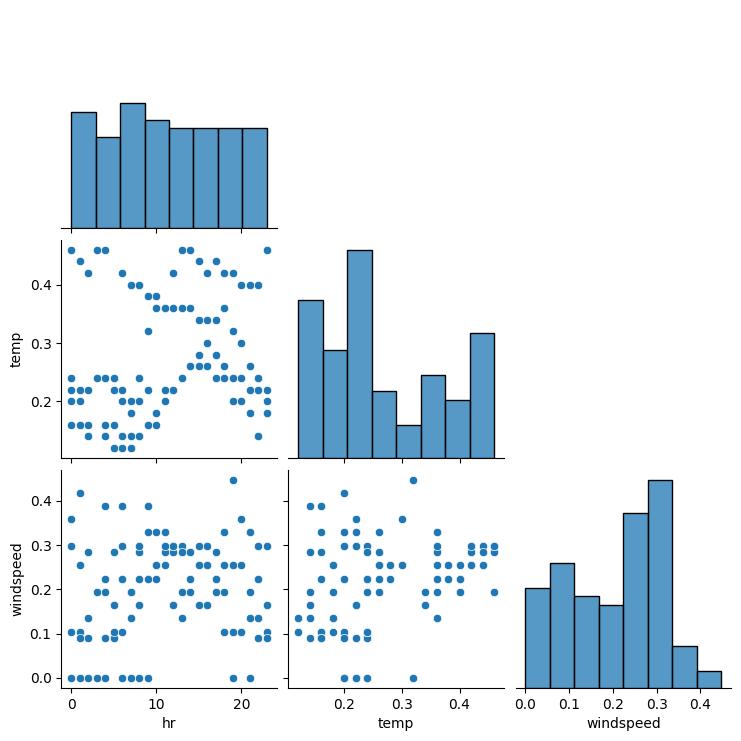

In [50]:
thevariables = ['hr','temp','windspeed']
hour_first100=hour.loc[0:100, thevariables]
sns.pairplot(hour_first100, corner=True)
plt.show()

## Exploring Correlations

In [51]:
print(hour['casual'].corr(hour['registered']))
print(hour['temp'].corr(hour['hum']))

0.5066177004294632
-0.06988139105119348


In [52]:
thenames = ['hr','temp','windspeed']
cor_matrix=hour[thenames].corr()
print(cor_matrix)

                 hr      temp  windspeed
hr         1.000000  0.137603   0.137252
temp       0.137603  1.000000  -0.023125
windspeed  0.137252 -0.023125   1.000000


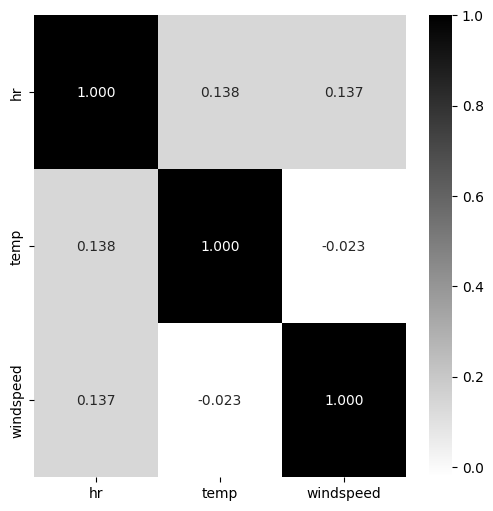

In [54]:
plt.figure(figsize=(6,6))
corr = hour[thenames].corr()
sns.heatmap(corr, annot=True, cmap='binary',
            fmt=".3f",
            xticklabels=thenames,
            yticklabels=thenames)
plt.show()

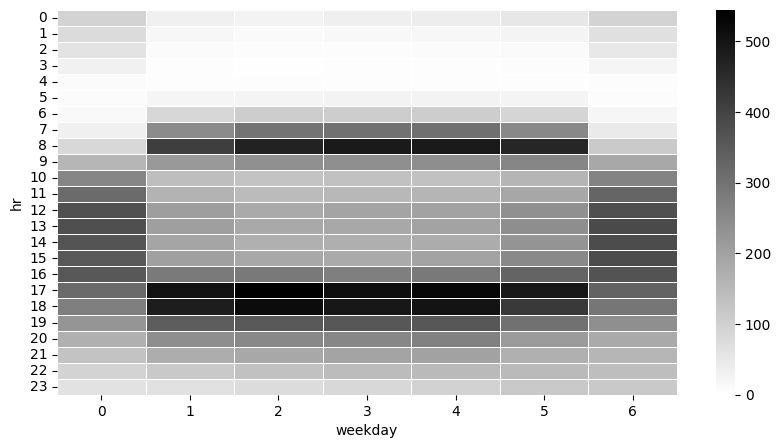

In [57]:
#Create a pivot table
df_hm = hour.pivot_table(index='hr', columns='weekday', values='count')
#draw a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df_hm, fmt="d", cmap='binary', linewidth=0.5, vmin=0)
plt.show()